In [70]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import glob
import numpy as np
from tqdm import tnrange, tqdm_notebook
from collections import defaultdict

In [2]:
wd = '/projects/ps-yeolab3/bay001/maps/current_annotations/se/'
all_positive_events = glob.glob(os.path.join(wd,'*.positive.nr.txt'))
all_negative_events = glob.glob(os.path.join(wd,'*.negative.nr.txt'))


In [159]:
def calculate_event_num(df, fdr, dpsi):
    dfx = df[(df['FDR'] < fdr) & (df['IncLevelDifference'] < -dpsi)]
    num_events = dfx.shape[0]
    return num_events

def calculate_event_nums_in_range(rmats_file, fdr_range, dpsi_range, pass_threshold=100):
    results_dict = defaultdict(list)
    nice_name = os.path.basename(rmats_file).replace('-SE.MATS.JunctionCountOnly','').replace('.nr.txt','')
    df = pd.read_table(rmats_file)
    for fdr in fdr_range:
        for dpsi in dpsi_range:
            key = fdr, dpsi
            if calculate_event_num(df, fdr, dpsi) >= pass_threshold:
                results_dict[key].append(1)
            else:
                results_dict[key].append(0)
    dfs = pd.DataFrame(results_dict).T # .reset_index()
    dfs.columns = [nice_name]
    return dfs

In [94]:
fdr_range = map(lambda x: x/100.0, range(0, 100, 1))
dpsi_range = map(lambda x: x/100.0, range(0, 100, 1))

progress = tnrange(len(all_positive_events))

merged = calculate_event_nums_in_range(
    all_positive_events[0],
    fdr_range, 
    dpsi_range
)
progress.update(1)
for event in all_positive_events[1:]:
    s = calculate_event_nums_in_range(
        event, 
        fdr_range, 
        dpsi_range
    )
    merged = pd.merge(merged, s, how='left', left_index=True, right_index=True)
    progress.update(1)
merged['summed'] = merged.sum(axis=1)
merged = merged.reset_index()
merged = merged[['level_0', 'level_1', 'summed']]

In [119]:
merged.columns = ['FDR','IncLevelDifference','Number RBPs with at least 100 events']

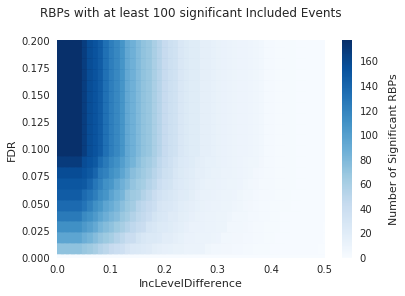

In [154]:
plt.scatter(
    merged['IncLevelDifference'], 
    merged['FDR'], 
    c=merged['Number RBPs with at least 100 events'],
    cmap='Blues',
    marker='s',
    s=200
)
cb = plt.colorbar()
cb.set_label(
    "Number of Significant RBPs", 
    labelpad=10)

plt.xlabel('IncLevelDifference')
plt.ylabel('FDR')
plt.ylim(0, 0.2)
plt.xlim(0, 0.5)
plt.title("RBPs with at least 100 significant Included Events", y=1.08)

In [160]:
fdr_range = map(lambda x: x/100.0, range(0, 100, 1))
dpsi_range = map(lambda x: x/100.0, range(0, 100, 1))

progress = tnrange(len(all_negative_events))

n_merged = calculate_event_nums_in_range(
    all_negative_events[0],
    fdr_range, 
    dpsi_range
)
progress.update(1)
for event in all_negative_events[1:]:
    s = calculate_event_nums_in_range(
        event, 
        fdr_range, 
        dpsi_range
    )
    n_merged = pd.merge(
        n_merged, 
        s, 
        how='left', 
        left_index=True, 
        right_index=True
    )
    progress.update(1)
n_merged['summed'] = n_merged.sum(axis=1)
n_merged = n_merged.reset_index()
n_merged = n_merged[['level_0', 'level_1', 'summed']]

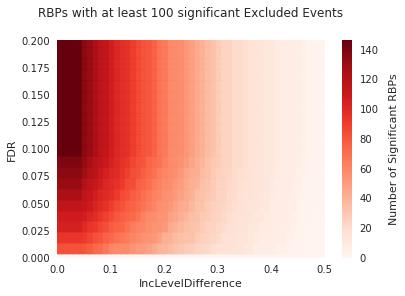

In [161]:
n_merged.columns = ['FDR','IncLevelDifference','Number RBPs with at least 100 events']
plt.scatter(
    n_merged['IncLevelDifference'], 
    n_merged['FDR'], 
    c=n_merged['Number RBPs with at least 100 events'],
    cmap='Reds',
    marker='s',
    s=200
)
cb = plt.colorbar()
cb.set_label(
    "Number of Significant RBPs", 
    labelpad=10)

plt.xlabel('IncLevelDifference')
plt.ylabel('FDR')
plt.ylim(0, 0.2)
plt.xlim(0, 0.5)
plt.title("RBPs with at least 100 significant Excluded Events", y=1.08)